# Linear regression in Tensorflow
 

In order to become acqainted to Tensorflow sintax let's implement linear regression in Tensorflow on a toy example of model fitting (linear dependency + uniform noise). Del tipo: **"Spariamo ad una mosca con un cannone"**...

In [1]:
# import needed modules
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

%matplotlib inline

/usr/local/Anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


(1, 1000)


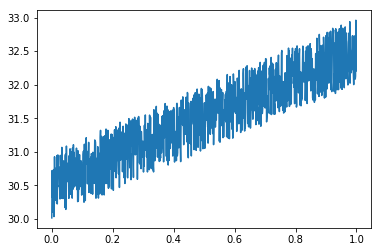

In [2]:
# generate synthetic data
npoints=1000
x=np.arange(0,npoints).reshape(1,npoints)/npoints
noise=1*np.random.rand(1,npoints)
true_a=2
true_b=30
y=((true_a*x)+true_b)+noise
plt.plot(x.flatten(),y.flatten())
print(y.shape)

In [3]:
# split in training and test set
trainsetsize=int(npoints*0.8)
testsetsize=npoints-trainsetsize
x_train=x[0,0:trainsetsize].reshape(1,trainsetsize)
x_test=x[0,trainsetsize:npoints].reshape(1,testsetsize)
y_train=y[0,0:trainsetsize].reshape(1,trainsetsize)
y_test=y[0,trainsetsize:npoints].reshape(1,testsetsize)

In [4]:
# define parameters inizialization function
def initialize_params():
    a = tf.get_variable("a", [1, 1], initializer = tf.zeros_initializer())
    b = tf.get_variable("b", [1, 1], initializer = tf.zeros_initializer())
    params = {"a": a,
              "b": b}
    return params
# TEST case
tf.reset_default_graph()
with tf.Session() as sess:
    params = initialize_params()
    print("a = " + str(params["a"]))
    print("b = " + str(params["b"]))

a = <tf.Variable 'a:0' shape=(1, 1) dtype=float32_ref>
b = <tf.Variable 'b:0' shape=(1, 1) dtype=float32_ref>


In [5]:
# define placeholder builder function
def create_placeholders(n_x, n_y):
    X = tf.placeholder(tf.float32, [n_x, None], name="X")
    Y = tf.placeholder(tf.float32, [n_y, None], name="Y")
    return X,Y
# TEST case
tf.reset_default_graph()
with tf.Session() as sess:
    (n_x, m) = x_train.shape                        
    (n_y, m)= y_train.shape 
    X,Y = create_placeholders(n_x, n_y)
    print("X = " + str(X))
    print("Y = " + str(Y))

X = Tensor("X:0", shape=(1, ?), dtype=float32)
Y = Tensor("Y:0", shape=(1, ?), dtype=float32)


In [6]:
# define predict function (our linear model)
def predict(x,params):
    a = params['a']
    b = params['b']
    y_predicted=tf.add(tf.multiply(a,x),b)
    return y_predicted
# TEST case
tf.reset_default_graph()
with tf.Session() as sess:
    params = initialize_params()
    (n_x, m) = x_train.shape                        
    (n_y, m)= y_train.shape 
    X,Y = create_placeholders(n_x, n_y)
    Y_predicted=predict(X,params)
    print("Y_predicted = " + str(Y_predicted))

Y_predicted = Tensor("Add:0", shape=(1, ?), dtype=float32)


In [7]:
# define cost function (over the whole batch)
def compute_cost(y_predicted,y):
    cost_vector=tf.pow(y-y_predicted, 2)
    cost = tf.reduce_mean(cost_vector,1)
    return cost
# TEST case
tf.reset_default_graph()
with tf.Session() as sess:
    params = initialize_params()
    (n_x, m) = x_train.shape                        
    (n_y, m)= y_train.shape 
    X,Y = create_placeholders(n_x, n_y)
    Y_predicted=predict(X,params)
    cost=compute_cost(Y_predicted,Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(1,), dtype=float32)


In [12]:
# define complete Tensorflow model using previously defined functions
def linear_model(x_train, y_train, x_test, y_test, learning_rate = 0.5,
          num_epochs = 10, print_cost = True):
    
    ops.reset_default_graph()   
    costs=[]
    
    (n_x, m) = x_train.shape                        
    (n_y, m)= y_train.shape 
    X,Y = create_placeholders(n_x, n_y)
    params = initialize_params()
    Y_predicted = predict(X,params) 
    cost=compute_cost(Y_predicted,Y)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer() 
    with tf.Session() as sess:
        sess.run(init)   

        for epoch in range(num_epochs):
            _,epoch_cost=sess.run([optimizer, cost], feed_dict={X: x_train, Y: y_train})
            
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
                costs.append(epoch_cost)
                
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        params = sess.run(params)
        print("Parameters have been trained!")
        
    return params

Cost after epoch 0: 980.891785
Cost after epoch 5: 72.604187
Cost after epoch 10: 8.642943
Cost after epoch 15: 3.856995
Cost after epoch 20: 3.243118
Cost after epoch 25: 2.945940
Cost after epoch 30: 2.693241
Cost after epoch 35: 2.463998
Cost after epoch 40: 2.254954
Cost after epoch 45: 2.064252
Cost after epoch 50: 1.890278
Cost after epoch 55: 1.731565
Cost after epoch 60: 1.586772
Cost after epoch 65: 1.454681
Cost after epoch 70: 1.334176
Cost after epoch 75: 1.224241
Cost after epoch 80: 1.123950
Cost after epoch 85: 1.032455
Cost after epoch 90: 0.948986
Cost after epoch 95: 0.872838
Cost after epoch 100: 0.803370
Cost after epoch 105: 0.739996
Cost after epoch 110: 0.682180
Cost after epoch 115: 0.629435
Cost after epoch 120: 0.581317
Cost after epoch 125: 0.537420
Cost after epoch 130: 0.497373
Cost after epoch 135: 0.460839
Cost after epoch 140: 0.427509
Cost after epoch 145: 0.397103
Cost after epoch 150: 0.369365
Cost after epoch 155: 0.344059
Cost after epoch 160: 0.320

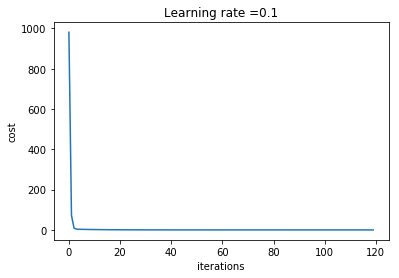

Parameters have been trained!
a = [[ 2.01893377]]
b = [[ 30.50728035]]


In [15]:
# run the model optimization (fit our linear model to the data)
params = linear_model(x_train, y_train, x_test, y_test, num_epochs = 600, learning_rate=0.1, print_cost=True)
print("a = " + str(params["a"]))
print("b = " + str(params["b"]))

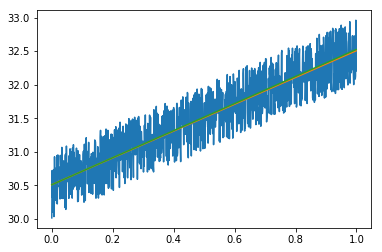

In [16]:
# compare optimization results with ground truth
y=((true_a*x)+true_b)+noise
plt.plot(x.flatten(),y.flatten())
y=((true_a*x)+true_b)+np.mean(noise)
plt.plot(x.flatten(),y.flatten())
y_out=((params["a"]*x)+params["b"])
plt.plot(x.flatten(),y_out.flatten())